# Trabalho de Dinâmica das máquinas

#### Tema: Gráfico com oscilações

##### Aluno: Abner Vieira Pereira

---

O presente trabalho visa mostrar um comparativo entre os gráficos de osciladores harmônicos sem amortecimento e com armortecimento (casos críticos, subamortecido e superamortecido).

In [1]:
from sympy import *
import sympy as sy
from numpy import *
import numpy as np 
import sympy.physics.mechanics as me
import matplotlib.pyplot as plt

###  Oscilador não amortecido:

In [2]:
#Criando símbolos:
m,k,w_n,A1,A2,x0,x0p = sy.symbols('m k omega_n A_1 A_2 x_0 x_0p')
x = me.dynamicsymbols('x')
t = me.dynamicsymbols._t

In [3]:
#Modelando o sistema:
L_e1= -k*x 
L_e1

-k*x(t)

In [4]:
L_d1 = m*x.diff(t,2)
L_d1

m*Derivative(x(t), (t, 2))

In [5]:
Eq_mov1 = sy.Eq(L_e1,L_d1)
Eq_mov1

Eq(-k*x(t), m*Derivative(x(t), (t, 2)))

In [6]:
Eq_mov1 = m*x.diff(t,2) + k*x
Eq_mov1

k*x(t) + m*Derivative(x(t), (t, 2))

In [7]:
Eq_mov1 = sy.Eq(Eq_mov1,0)
Eq_mov1

Eq(k*x(t) + m*Derivative(x(t), (t, 2)), 0)

In [8]:
#Dividindo a equação acima por k, temos:
Eq_mov1 = x.diff(t,2) + k/m*x
Eq_mov1 = sy.Eq(Eq_mov1,0)
Eq_mov1

Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)

Sabemos que $\omega_n$ = $\sqrt{\frac{k}{m}}$, logo:

In [9]:
Eq_mov1 = x.diff(t,2) + w_n**2*x
Eq_mov1 = sy.Eq(Eq_mov1,0)
Eq_mov1

Eq(omega_n**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [10]:
#A solução dessa EDO homogênea é:
x1 = A1*sy.cos(w_n*t) + A2*sy.sin(w_n*t)
x1

A_1*cos(omega_n*t) + A_2*sin(omega_n*t)

#### Aplicando as condições inicias:
$$x (t=0) = x_0$$
$$\dot{x} = \dot{x}_0 $$
</br>

Obtemos:

$$A_1 = x_0$$</br>
$$A_2 = \frac{\dot{x}_0}{\omega_n}$$

Passando os parâmetros do sistema:

In [11]:
ms = int(input('Qual é a massa [kg] do bloco? '))

Qual é a massa [kg] do bloco?  12


In [12]:
ks = int(input('Qual é a rigidez[N.m] da mola? '))

Qual é a rigidez[N.m] da mola?  2


In [13]:
x0s = int(input('Qual é a posição inicial[m]? '))

Qual é a posição inicial[m]?  1


In [14]:
x0ps = int(input('Qual é a velocidade inicial[m/s]? '))

Qual é a velocidade inicial[m/s]?  0


In [15]:
w_ns = (ks/ms)**(0.5)
A1s = x0s
A2s = x0ps/w_ns

In [16]:
#Criando um dicionário para armazenar o valor dos parâmetros nas variáveis e depois substituí-lo na solução:
dic1 = {A1:A1s, A2:A2s, w_n:w_ns}

In [17]:
sol1_num = x1.subs(dic1)
sol1_num

cos(0.408248290463863*t)

Plotando gráfico:

In [18]:
lam_f = sy.lambdify(t,sol1_num)
tn = np.linspace(0,50,1000)
sol1 = lam_f(tn)

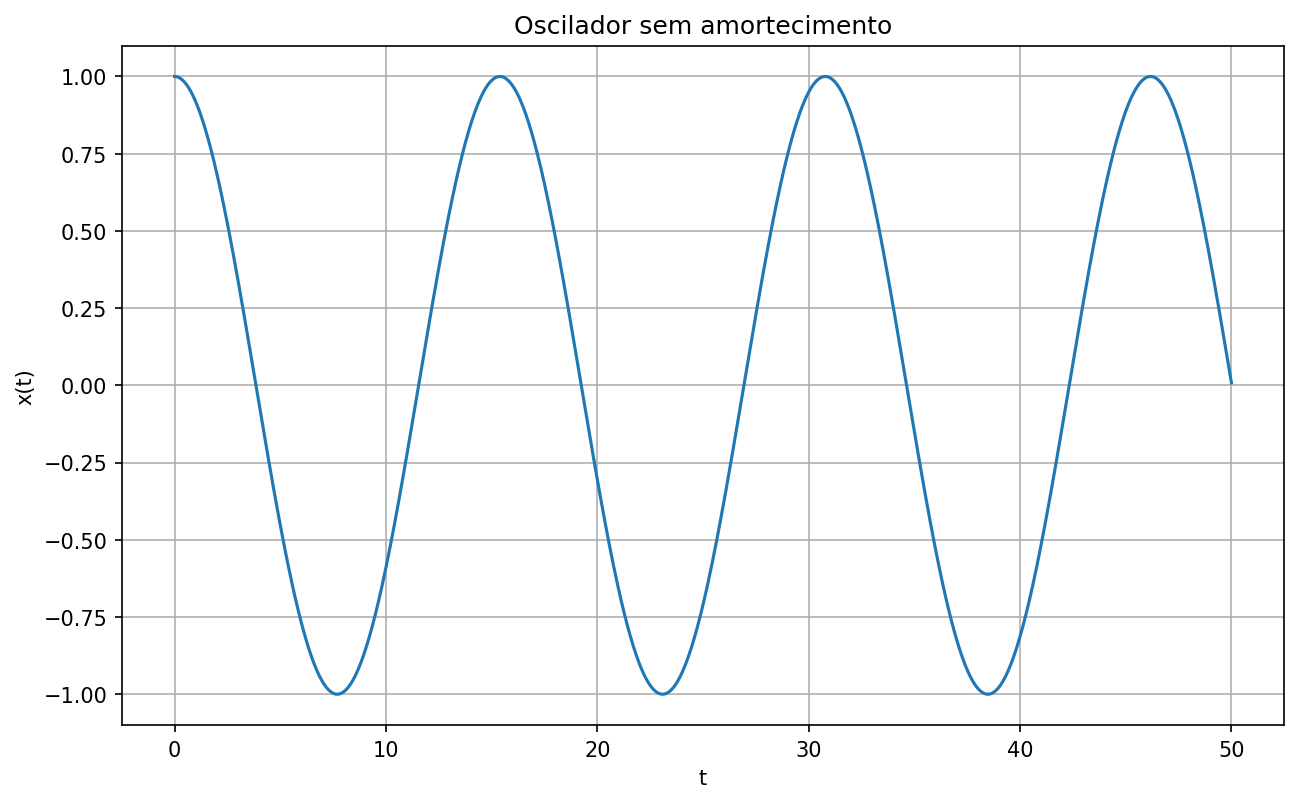

In [19]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(tn,sol1)
plt.title('Oscilador sem amortecimento')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.grid(True)

### Osciladores amortecidos:

In [20]:
#criando um símbolo para a constante de amortecimento
c,s = sy.symbols('c s')

In [21]:
#lado esquerdo da equação:
l_e2 = -k*x - c*x.diff(t)
l_e2

-c*Derivative(x(t), t) - k*x(t)

In [22]:
#lado direito da equação:
l_d2 = m*x.diff(t,2)
l_d2

m*Derivative(x(t), (t, 2))

In [23]:
Eq_mov2 = sy.Eq(l_e2,l_d2)
Eq_mov2

Eq(-c*Derivative(x(t), t) - k*x(t), m*Derivative(x(t), (t, 2)))

In [24]:
Eq_mov2 = m*x.diff(t,2) + c*x.diff(t) + k*x
Eq_mov2

c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2))

In [25]:
Eq_mov2 = sy.Eq(Eq_mov2,0)
Eq_mov2

Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), 0)

A equação característica da EDO é :

In [26]:
Eq_c = m*s**2 + c*s + k
Eq_c

c*s + k + m*s**2

In [27]:
Eq_c = sy.Eq(Eq_c,0)
Eq_c

Eq(c*s + k + m*s**2, 0)

In [28]:
sol_1 = solve(Eq_c, s)
sol_1

[(-c + sqrt(c**2 - 4*k*m))/(2*m), -(c + sqrt(c**2 - 4*k*m))/(2*m)]

* Podemos ter 3 casos de amortecimento dependendo das raízes dessa equação:
1. Caso sejam duas raízes reais e distintas, temos o caso de superamortecimento
2. Caso sejam duas raízes reais e idênticas, temos um amortecimento crítico
3. Por fim, caso sejam duas raízes complexas, temos um amortecimento subcrítico

#### Amortecimento crítico:

In [29]:
# A solução do sistema amortecido subcrítico é dada por
x1 = (sy.exp(-w_n*t))*(x0 +(x0p + x0*w_n)*t)
x1

(t*(omega_n*x_0 + x_0p) + x_0)*exp(-omega_n*t)

In [30]:
dic2 = {w_n:w_ns,x0:x0s,x0p:x0ps,m:ms}

In [31]:
x1_num = x1.subs(dic2)
x1_num

(0.408248290463863*t + 1)*exp(-0.408248290463863*t)

#### Sistema superamortecido:

In [32]:
#Criando símbolos necessários
zeta, C1, C2, s1, s2, c, z = sy.symbols('zeta C1 C2 s1 s2 c z')

In [33]:
c = float(input('Informe a constante de amortecimento do sistema: '))

Informe a constante de amortecimento do sistema:  15


In [34]:
z = c/(2*ms*w_ns)
z

1.5309310892394865

In [35]:
dic3 = {w_n:w_ns, x0:x0s, x0p:x0ps, zeta:z}

In [36]:
s1 = (-zeta + sy.sqrt(zeta**2 - 1))*w_n
s1

omega_n*(-zeta + sqrt(zeta**2 - 1))

In [37]:
s2 = (-zeta - sy.sqrt(zeta**2 - 1))*w_n
s2

omega_n*(-zeta - sqrt(zeta**2 - 1))

Aplicando as condções de contorno, obtemos C1 e C2:

In [38]:
C1 = (x0*w_n*(zeta + sy.sqrt(zeta**2 - 1)) + x0p)/(2*w_n*sy.sqrt(zeta**2 - 1))
C1

(omega_n*x_0*(zeta + sqrt(zeta**2 - 1)) + x_0p)/(2*omega_n*sqrt(zeta**2 - 1))

In [39]:
C2 = (-x0*w_n*(zeta - sy.sqrt(zeta**2 - 1)) + x0p)/(2*w_n*sy.sqrt(zeta**2 - 1))
C2

(-omega_n*x_0*(zeta - sqrt(zeta**2 - 1)) + x_0p)/(2*omega_n*sqrt(zeta**2 - 1))

In [40]:
x2 = C1*sy.exp(s1*t) + C2*sy.exp(s2*t)
x2

(-omega_n*x_0*(zeta - sqrt(zeta**2 - 1)) + x_0p)*exp(omega_n*t*(-zeta - sqrt(zeta**2 - 1)))/(2*omega_n*sqrt(zeta**2 - 1)) + (omega_n*x_0*(zeta + sqrt(zeta**2 - 1)) + x_0p)*exp(omega_n*t*(-zeta + sqrt(zeta**2 - 1)))/(2*omega_n*sqrt(zeta**2 - 1))

In [41]:
x2_num = x2.subs(dic3)
x2_num

-0.160338179744218*exp(-1.09824236215002*t) + 1.16033817974422*exp(-0.151757637849977*t)

#### Sistema subamortecido:

In [42]:
zeta2, C1l, C2l, c2, z2, phi  = sy.symbols('zeta_2 C1l C2l c2 z2 phi')

In [43]:
#A solução é:
x3 = x0*sy.exp(zeta2*w_n*t)*sy.sin(sy.sqrt(1 - zeta2**2)*w_n*t + phi)
x3

x_0*exp(omega_n*t*zeta_2)*sin(omega_n*t*sqrt(1 - zeta_2**2) + phi)

In [44]:
z2 = float(input('Digite o valor de zeta'))

Digite o valor de zeta -0.3


In [45]:
phis = float(input('Digite o valor da fase: '))

Digite o valor da fase:  90


In [46]:
phis = (phis*np.pi)/180
phis

1.5707963267948966

In [47]:
dic4 = {x0:x0s, w_n:w_ns, x0p:x0ps, zeta2:z2, phi:phis}

In [48]:
x3_num = x3.subs(dic4)
x3_num

exp(-0.122474487139159*t)*sin(0.389444048184931*t + 1.5707963267949)

## Plotando os gráficos:

In [49]:
tn = np.linspace(0,50,1000)
lam_f = sy.lambdify(t,sol1_num)
lam_f1 = sy.lambdify(t,x1_num)
lam_f2 = sy.lambdify(t,x2_num)
lam_f3 = sy.lambdify(t, x3_num)
sol1 = lam_f(tn)
sol2 = lam_f1(tn)
sol3 = lam_f2(tn)
sol4 = lam_f3(tn)

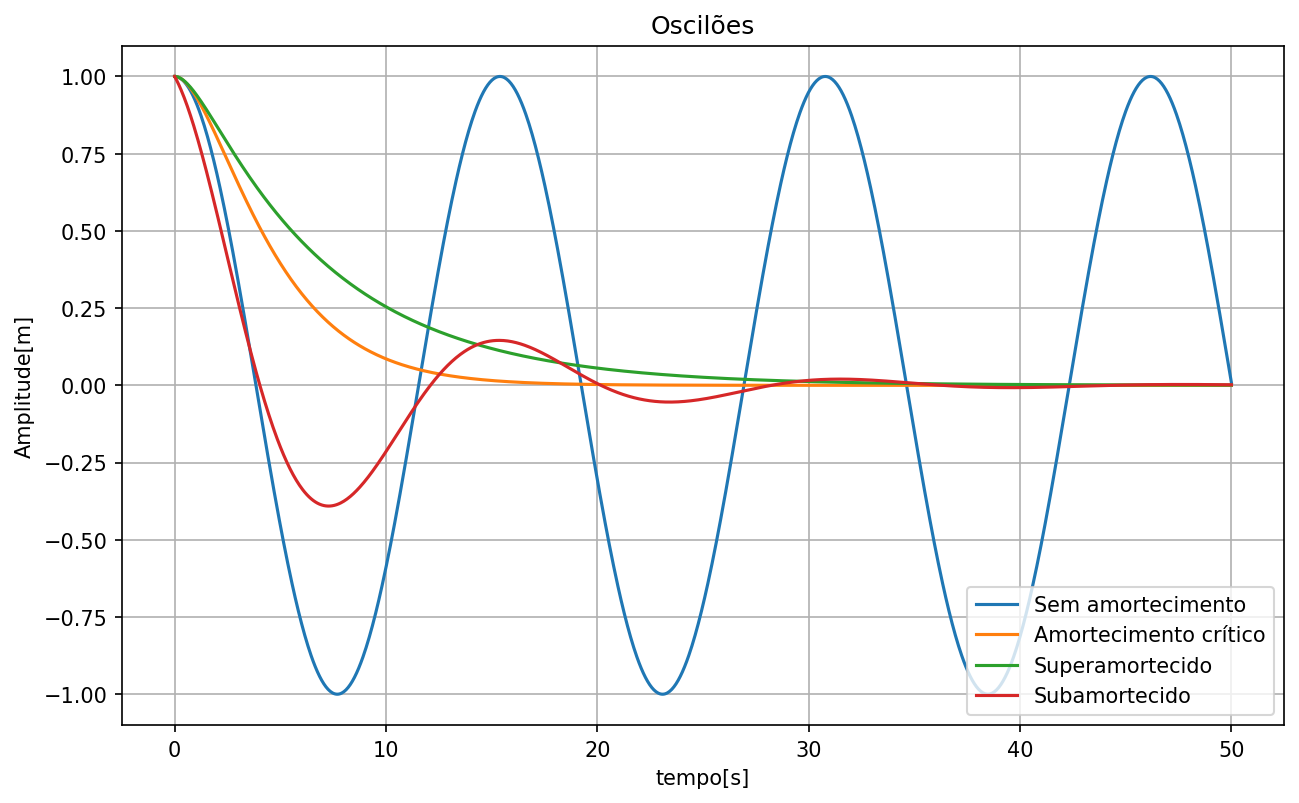

In [50]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(tn,sol1, label='Sem amortecimento')
plt.plot(tn,sol2, label='Amortecimento crítico')
plt.plot(tn,sol3, label='Superamortecido')
plt.plot(tn,sol4, label='Subamortecido')
plt.title('Oscilões')
plt.ylabel('Amplitude[m]')
plt.xlabel('tempo[s]')
plt.grid(True)
plt.legend()

# 